<a href="https://colab.research.google.com/github/AOKwame/Churning2026/blob/main/Churning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
datachurn_test= pd.read_csv("customer_churn_testing.csv")
datachurn_train= pd.read_csv("customer_churn_training.csv")

In [4]:
datachurn_test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [5]:
datachurn_train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [6]:
datachurn_all= pd.concat([datachurn_train, datachurn_test])

In [7]:
datachurn_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


In [8]:
datachurn_all.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [9]:
datachurn_all.dtypes

,0
CustomerID,float64
Age,float64
Gender,object
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Subscription Type,object
Contract Length,object
Total Spend,float64


In [10]:
datachurn_all['Subscription Type'].value_counts()

,count
Subscription Type,
Standard,170630
Premium,170099
Basic,164477


In [11]:
datachurn_all['Contract Length'].value_counts()

,count
Contract Length,
Annual,198608
Quarterly,197364
Monthly,109234


In [12]:
datachurn_all['Gender'].value_counts()

,count
Gender,
Male,280273
Female,224933


In [13]:
datachurn_all['Gender'].dtypes

dtype('O')

In [14]:
Subs_Dummies= pd.get_dummies(datachurn_all[['Subscription Type']], dtype='int')
Contract_Dummies= pd.get_dummies(datachurn_all[['Contract Length']], dtype='int')

In [15]:
print(Subs_Dummies.iloc[:,1:])
Contract_Dummies.iloc[:,1:]

       Subscription Type_Premium  Subscription Type_Standard
0                              0                           1
1                              0                           0
2                              0                           0
3                              0                           1
4                              0                           0
...                          ...                         ...
64369                          0                           0
64370                          0                           1
64371                          1                           0
64372                          0                           1
64373                          0                           1

[505207 rows x 2 columns]


,Contract Length_Monthly,Contract Length_Quarterly
0,0,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
64369,0,1
64370,0,0
64371,1,0
64372,1,0


In [16]:
Genderdummies= pd.get_dummies(datachurn_all[['Gender']], dtype='int')

In [17]:
Genderdummies.iloc[:,-2:]

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
64369,1,0
64370,0,1
64371,0,1
64372,1,0


In [18]:
datachurn_2nd= pd.concat([datachurn_all.iloc[:,:-1], Genderdummies.iloc[:,-2:],Subs_Dummies.iloc[:,1:], Contract_Dummies.iloc[:,1:],datachurn_all.iloc[:,-1:]], axis=1)

In [19]:
datachurn_2nd.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1,0,0,1,0,0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1,0,0,0,1,0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1,0,0,0,0,1,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,0,1,0,1,1,0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,0,1,0,0,1,0,1.0


In [20]:
datachurn_2nd.drop(['Gender', 'Subscription Type', 'Contract Length'], axis=1, inplace=True)

In [21]:
datachurn_2nd

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly,Churn
0,2.0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1,0,0,1,0,0,1.0
1,3.0,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1,0,0,0,1,0,1.0
2,4.0,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1,0,0,0,0,1,1.0
3,5.0,58.0,38.0,21.0,7.0,7.0,396.0,29.0,0,1,0,1,1,0,1.0
4,6.0,23.0,32.0,20.0,5.0,8.0,617.0,20.0,0,1,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,33.0,12.0,6.0,21.0,947.0,14.0,1,0,0,0,0,1,1.0
64370,64371.0,37.0,6.0,1.0,5.0,22.0,923.0,9.0,0,1,0,1,0,0,1.0
64371,64372.0,25.0,39.0,14.0,8.0,30.0,327.0,20.0,0,1,1,0,1,0,1.0
64372,64373.0,50.0,18.0,19.0,7.0,22.0,540.0,13.0,1,0,0,1,1,0,1.0


In [22]:
datachurn_2nd.isna().sum()

,0
CustomerID,1
Age,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Total Spend,1
Last Interaction,1
Gender_Female,0
Gender_Male,0


In [23]:
datachurn_2nd.isna().sum()

,0
CustomerID,1
Age,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Total Spend,1
Last Interaction,1
Gender_Female,0
Gender_Male,0


In [24]:
datachurn_2nd= (datachurn_2nd.transform(lambda x: x.fillna(0))).fillna(0)

In [25]:
datachurn_2nd

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly,Churn
0,2.0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1,0,0,1,0,0,1.0
1,3.0,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1,0,0,0,1,0,1.0
2,4.0,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1,0,0,0,0,1,1.0
3,5.0,58.0,38.0,21.0,7.0,7.0,396.0,29.0,0,1,0,1,1,0,1.0
4,6.0,23.0,32.0,20.0,5.0,8.0,617.0,20.0,0,1,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,33.0,12.0,6.0,21.0,947.0,14.0,1,0,0,0,0,1,1.0
64370,64371.0,37.0,6.0,1.0,5.0,22.0,923.0,9.0,0,1,0,1,0,0,1.0
64371,64372.0,25.0,39.0,14.0,8.0,30.0,327.0,20.0,0,1,1,0,1,0,1.0
64372,64373.0,50.0,18.0,19.0,7.0,22.0,540.0,13.0,1,0,0,1,1,0,1.0


##### Review all data

In [26]:
X = datachurn_2nd.iloc[:,:-1]

In [27]:
Y = datachurn_2nd.iloc[:,-1:]

In [28]:
mSize=0.30
mRandom=42

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=mSize, random_state=mRandom)

In [30]:
print(Y_train)
print(Y_test)

        Churn
6414      1.0
324150    0.0
118147    1.0
213395    1.0
37513     1.0
...       ...
259178    0.0
365838    0.0
131932    1.0
146867    1.0
121958    1.0

[353644 rows x 1 columns]
        Churn
89623     1.0
45807     1.0
405193    0.0
12379     0.0
100779    1.0
...       ...
111323    1.0
238649    1.0
295861    0.0
255747    0.0
193093    1.0

[151563 rows x 1 columns]


In [31]:
Clr=RandomForestClassifier()

In [32]:
X_train

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
6414,6423.0,43.0,16.0,23.0,1.0,1.0,290.00,29.0,1,0,0,1,0,0
324150,331265.0,37.0,34.0,1.0,1.0,12.0,555.12,1.0,0,1,0,0,0,0
118147,121913.0,37.0,39.0,24.0,4.0,23.0,469.00,11.0,0,1,0,1,0,1
213395,218783.0,22.0,3.0,21.0,10.0,16.0,389.45,17.0,0,1,0,0,0,1
37513,37778.0,43.0,46.0,28.0,4.0,21.0,675.00,10.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,266292.0,22.0,52.0,17.0,2.0,13.0,930.17,16.0,0,1,0,1,0,0
365838,372953.0,45.0,12.0,11.0,2.0,13.0,976.76,12.0,0,1,0,1,0,0
131932,136272.0,37.0,9.0,4.0,10.0,12.0,979.00,8.0,1,0,0,0,1,0
146867,151678.0,33.0,27.0,5.0,10.0,20.0,824.00,1.0,0,1,1,0,0,0


In [33]:
Model_Clr=Clr.fit(X_train,Y_train.values.ravel())

In [34]:
Y_predict=Model_Clr.predict(X_test)

In [35]:
AccuracyResult=accuracy_score(Y_test,Y_predict)
print(AccuracyResult)

0.935116090338671


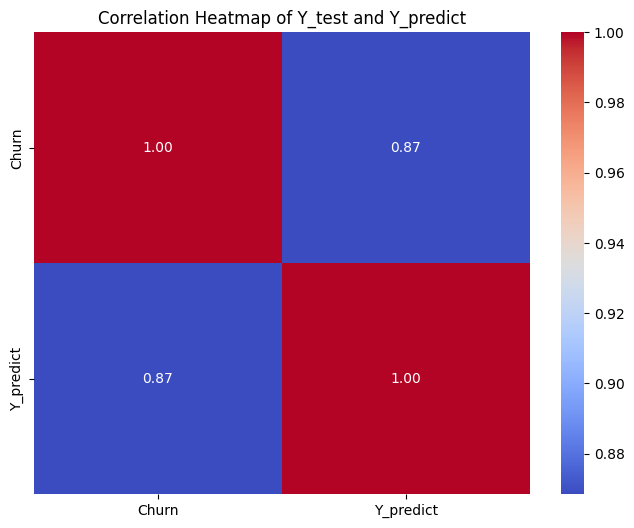

In [36]:
Y_predict_df = pd.DataFrame(Y_predict, columns=['Y_predict'], index=Y_test.index)
CorrDf = pd.concat([Y_test, Y_predict_df], axis=1)
correlation_matrix = CorrDf.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Y_test and Y_predict')
plt.show()

##### Grid Search Implementation

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [38]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.0001]
}

grid_svc = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

In [ ]:
Y_train.values.ravel()

array([1., 0., 1., ..., 1., 1., 1.])

In [ ]:
grid.fit(X_train,Y_train.values.ravel())

# Access best results
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy'}
0.9366651211978031


In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy'}
0.9366651211978031


In [ ]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy')

##### svc

In [ ]:
grid_svc.fit(X_train,Y_train.values.ravel())